# Titanic Passenger Survival Prediction

1. **PROBLEM STATEMENT**


During the Titanic disaster, passenger survival was influenced by factors such as age, gender, and passenger class.
The objective of this project is to build a binary classification machine learning model to predict whether a passenger survived (Yes/No) using historical passenger data and to identify the most important factors affecting survival.

2. **OBJECTIVES OF THE PROJECT**

* Understand passenger survival patterns
* Perform basic data preprocessing
* Conduct minimal but meaningful EDA
* Build binary classification models
* Evaluate model performance
* Identify key survival-influencing features

**3. Dataset Description**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving train.csv to train.csv


In [ ]:
import pandas as pd
df = pd.read_csv("train.csv")
print(df)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

In [ ]:
df.shape

(891, 12)

In [ ]:
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
886,False
887,False
888,False
889,False


In [ ]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


# 4 Explorary Data Analysys

Graph 1 Survival Count Plot

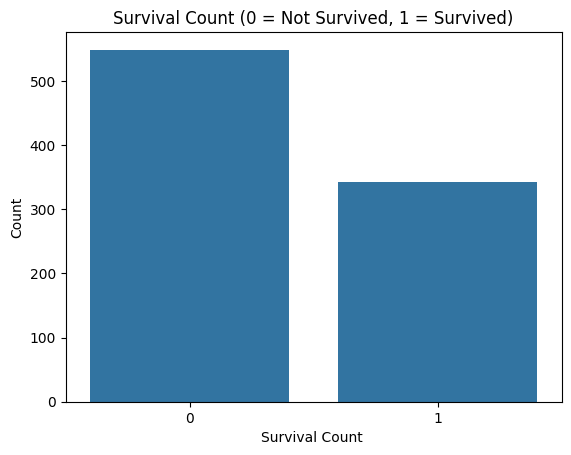

In [ ]:
import seaborn as sns
sns.countplot(x='Survived', data=df)
plt.title('Survival Count (0 = Not Survived, 1 = Survived)')
plt.xlabel("Survival Count ")
plt.ylabel("Count")
plt.show()

Graph 2 Survival By Gender

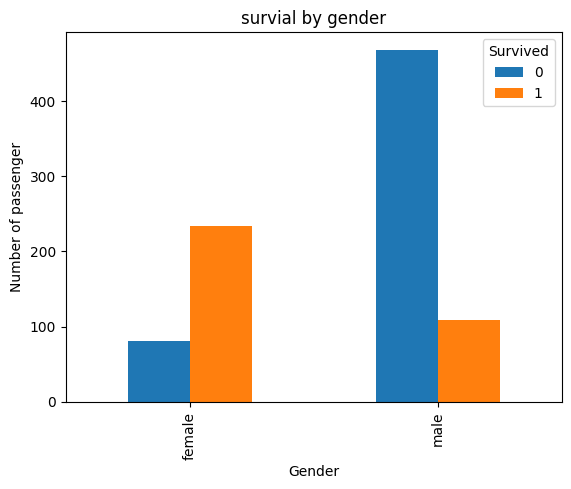

In [ ]:

gender_survival = df.groupby(['Sex','Survived']).size().unstack()

gender_survival.plot(kind='bar')
plt.xlabel("Gender")
plt.ylabel("Number of passenger")
plt.title('survial by gender')
plt.show()

Graph 3 Survival By Passenger class

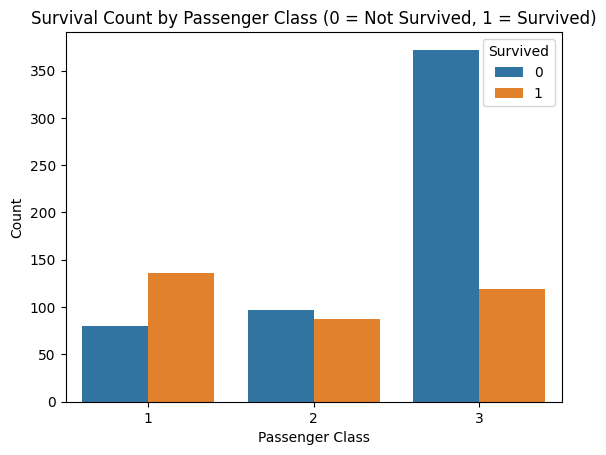

In [ ]:
sns.countplot(x='Pclass', hue='Survived', data=df)
plt.title('Survival Count by Passenger Class (0 = Not Survived, 1 = Survived)')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.show()

Graph 4: Fare vs Survival

Text(0, 0.5, 'Fare')

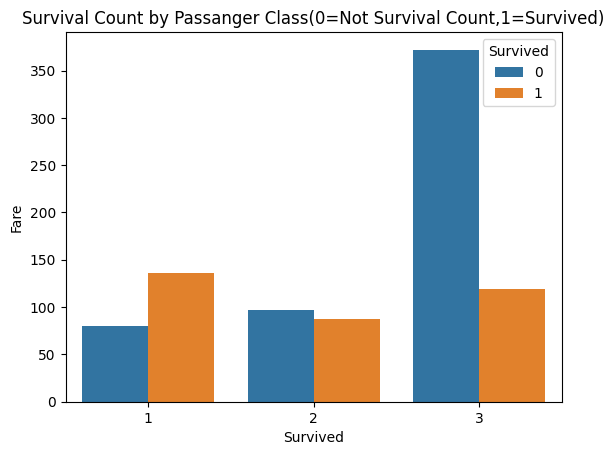

In [ ]:
sns.countplot(x='Pclass',hue="Survived",data=df)
plt.title('Survival Count by Passanger Class(0=Not Survival Count,1=Survived)')
plt.xlabel("Survived")
plt.ylabel("Fare")

# 5 Machine Learning Workflow

In [ ]:
import pandas as pd
df=pd.read_csv("train.csv")
print(df)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

**HANDLE THE MISSING VALUES**

In [ ]:
df["Age"] = df["Age"].fillna(df["Age"].median())

df["Embarked"] = df["Embarked"].fillna(df["Embarked"].mode([0]))
print(df)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

Drop columns with missing values(cabin

In [ ]:
df.drop('Cabin',axis=1,inplace=True)

**Encode categorical variables (Sex, Embarked)**

In [ ]:
le = LabelEncoder()

df['Sex'] = le.fit_transform(df['Sex'])
df['Embarked'] = le.fit_transform(df['Embarked'])
print(df)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name  Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    1  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...    0  38.0      1   
2                               Heikkinen, Miss. Laina    0  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)    0  35.0      1   
4                             Allen, Mr. William Henry    1  35.0      0   
..                                                 ...  ...   ...    ...   
886        

**Scale Features**

In [ ]:
X = df[['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']]
y = df[['Survived']]

**Split data into training and testing sets**

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(
    X,y,test_size=0.25,random_state=42
)

# 6 Model Used

**Logistic Regression**

In [ ]:
model=LogisticRegression()
model.fit(X_train,y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

**Decision Tree**

In [ ]:
model = DecisionTreeClassifier(criterion='gini',max_depth=4)
model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=4)

**Random Forest**

In [ ]:
rf = RandomForestClassifier(
    n_estimators=200,
    bootstrap=True,
    random_state=42
)
rf.fit(X_train,y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(n_estimators=200, random_state=42)

# 7. Model Evaluation

**Graph 5:Confusion Matrics**

In [ ]:
y_pred = model.predict(X_test)
print(y_pred)

cm = confusion_matrix(y_test,y_pred)
print(cm)

[0 0 0 1 1 1 1 0 1 1 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 1 0 1 0 1 0 0 0
 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 1 1 1 0 1 1 0 0 1 0 0 0 1 1 1 0 1
 0 0 1 1 1 0 0 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1
 0 1 0 0 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 1 0 0 1 0 1 1 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 1 1 1 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 1 1 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 1 1 1 0 1 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0 1 1 0 1 0 0 1
 0]
[[119  15]
 [ 28  61]]


In [ ]:
print("Accuracy:",accuracy_score(y_test,y_pred))
print("Precision:",precision_score(y_test,y_pred))
print("Recall:",recall_score(y_test,y_pred))
print("F1_Score:",f1_score(y_test,y_pred))

Accuracy: 0.8071748878923767
Precision: 0.8026315789473685
Recall: 0.6853932584269663
F1_Score: 0.7393939393939394


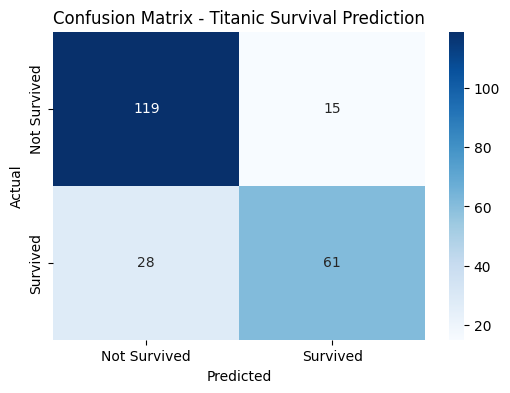

In [ ]:
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Survived', 'Survived'],
            yticklabels=['Not Survived', 'Survived'])

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Titanic Survival Prediction')
plt.show()

# Identifying Survival Influencing Factors

In [ ]:
importances = rf.feature_importances_
feature_names = X.columns

feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})



**Graph 6: Feature Importance (Random Forest)**

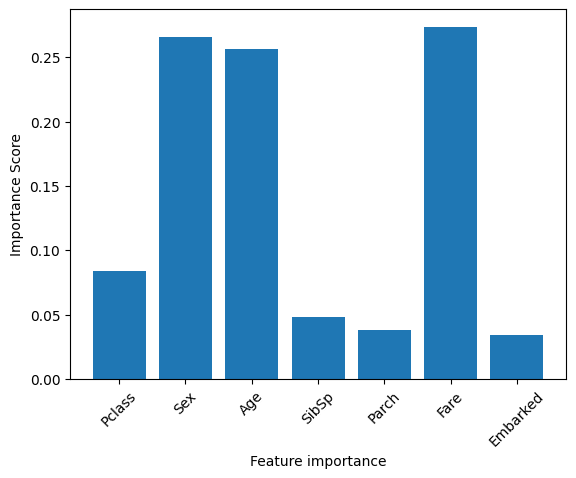

In [ ]:
plt.figure()
plt.bar(feature_names,importances)
plt.ylabel("Importance Score")
plt.xlabel("Feature importance")
plt.xticks(rotation=45)
plt.show()